# Final doodle recognition model 

Model will be trained on 100 classes from Google's QuickDraw dataset. The classes from chosen as a random sample from the dataset. 

## Loading in the classes

In [21]:
f = open("../classes.txt")
categories = f.readlines()
f.close()
categories = [category.replace('\n', '').replace(' ', '') for category in categories]
print(categories)

['drums', 'sun', 'laptop', 'dog', 'baseball_bat', 'ladder', 'eyeglasses', 'grapes', 'book', 'dumbbell', 'traffic_light', 'wristwatch', 'wheel', 'shovel', 'bread', 'table', 'tennis_racquet', 'cloud', 'chair', 'headphones', 'face', 'eye', 'airplane', 'snake', 'lollipop', 'guitar', 'pants', 'mushroom', 'star', 'sword', 'clock', 'hot_dog', 'syringe', 'stop_sign', 'mountain', 'smiley_face', 'apple', 'bed', 'shorts', 'broom', 'diving_board', 'flower', 'spider', 'cell_phone', 'car', 'camera', 'tree', 'square', 'moon', 'radio', 'hat', 'pizza', 'axe', 'door', 'tent', 'umbrella', 'line', 'cup', 'fan', 'triangle', 'basketball', 'pillow', 'scissors', 't-shirt', 'tooth', 'alarm_clock', 'paper_clip', 'spoon', 'microphone', 'candle', 'pencil', 'envelope', 'saw', 'frying_pan', 'screwdriver', 'helmet', 'bridge', 'light_bulb', 'ceiling_fan', 'key', 'donut', 'bird', 'circle', 'beard', 'coffee_cup', 'butterfly', 'bench', 'rifle', 'cat', 'sock', 'ice_cream', 'moustache', 'suitcase', 'hammer', 'rainbow', 'k

## Downloading dataset


In [24]:
import urllib.request
!mkdir data
def download_data():
    url = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
    for category in categories:
        label_name = category.replace('_', '%20')
        path = url + label_name + '.npy'
        print(path)
        urllib.request.urlretrieve(path, 'data/'+category+'.npy')

download_data()


https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/drums.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sun.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/laptop.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dog.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/baseball%20bat.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ladder.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/eyeglasses.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/grapes.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/book.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dumbbell.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/traffic%20light.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/wristwatch.npy
https://storage.googleapis.com/quickdraw_datas

### Load data

Using 4000 images per class as training takes a long time on this local computer (around 7 mins per epoch)

In [25]:
import os
import glob 
import numpy as np

In [36]:
def load_data(path, split_ratio=0.2, class_size=4000):
    data_folder = glob.glob(os.path.join(path, '*.npy'))
    x = np.empty([0, 784])   # Because each image is 28 * 28
    y = np.empty([0])
    class_names = []
    for i, file_name in enumerate(data_folder):
        data = np.load(file_name)
        data = data[0:class_size, :]
        labels = np.full(data.shape[0], i)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file_name))
        class_names.append(class_name)
    data = None
    labels = None

    # Data randomization
    perm = np.random.permutation(y.shape[0])
    x = x[perm, :]
    y = y[perm]

    # Split set
    split_size = int(x.shape[0]/100*(split_ratio*100))

    x_test = x[0:split_size, :]
    y_test = y[0:split_size]

    x_train = x[split_size:x.shape[0], :]
    y_train = y[split_size:y.shape[0]]

    return x_train, y_train, x_test, y_test, class_names

In [37]:
x_train, y_train, x_test, y_test, class_names = load_data('data')
print(len(x_train))

320000


## Plot some data

line


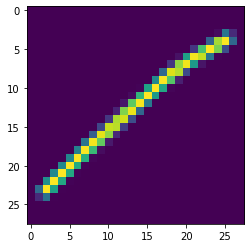

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.imshow(x_train[4000].reshape(28, 28))
print(class_names[int(y_train[4000].item())])

## Data preprocessing

In [65]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

In [43]:
IMAGE_SIZE = 28
x_train = x_train.reshape(x_train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1).astype('float32')

# Normalize
x_train /= 255.0
x_test /= 255.0

# One hot encoding
y_train = keras.utils.to_categorical(y_train, len(class_names))
y_test = keras.utils.to_categorical(y_test, len(class_names))

## Define the model

In [49]:
def CNN():
    model = keras.Sequential()
    model.add(layers.Convolution2D(16, (3, 3),
                            padding='same',
                            input_shape=x_train.shape[1:], activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
    model.add(layers.MaxPooling2D(pool_size =(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(100, activation='softmax')) 
    # Train model
    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['top_k_categorical_accuracy'])  
    return model

In [50]:
model = CNN()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)              

In [51]:
history = model.fit(x_train, y_train, validation_split=0.1, batch_size=256, verbose=2, epochs=5)

Train on 288000 samples, validate on 32000 samples
Epoch 1/5
288000/288000 - 460s - loss: 1.9857 - top_k_categorical_accuracy: 0.7706 - val_loss: 1.4209 - val_top_k_categorical_accuracy: 0.8703
Epoch 2/5
288000/288000 - 463s - loss: 1.2808 - top_k_categorical_accuracy: 0.8877 - val_loss: 1.2005 - val_top_k_categorical_accuracy: 0.8957
Epoch 3/5
288000/288000 - 470s - loss: 1.1093 - top_k_categorical_accuracy: 0.9071 - val_loss: 1.0828 - val_top_k_categorical_accuracy: 0.9106
Epoch 4/5
288000/288000 - 465s - loss: 1.0161 - top_k_categorical_accuracy: 0.9173 - val_loss: 1.0214 - val_top_k_categorical_accuracy: 0.9172
Epoch 5/5
288000/288000 - 468s - loss: 0.9536 - top_k_categorical_accuracy: 0.9235 - val_loss: 0.9884 - val_top_k_categorical_accuracy: 0.9197


In [52]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy:{score[1]*100}")

Accuracy:91.86750054359436


['lollipop', 'spoon', 'microphone', 'stop_sign', 'key']


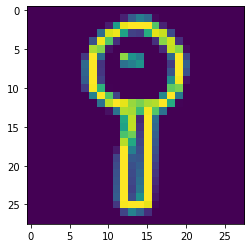

In [53]:
import matplotlib.pyplot as plt 
from random import randint
%matplotlib inline
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze())
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:5]
latex = [class_names[x] for x in ind]
print(latex)

In [54]:
with open('class_names.txt', 'w') as file_handle:
    for i in class_names:
        file_handle.write(f"{i}\n")

In [67]:
%pip install tensorflowjs

Note: you may need to restart the kernel to use updated packages.


## Save the model

In [69]:
model.save("model.h5")
!mkdir model
!tensorflowjs_converter --input_format keras model.h5 model/

mkdir: model: File exists
